In [46]:
import pandas as pd

In [47]:
import numpy as np

In [48]:
import csv
with open("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_videos_2014_comp.csv", newline='') as f:
    table = list(csv.reader(f))
print(table)

[['idx', 'videoId', 'content', 'video_visual', 'paper_visual', 'audio_style', 'idx_paper', 'q', 'title', 'description', 'publishedAt', 'tags', 'defaultLanguage', 'defaultAudioLanguage', 'channelTitle', 'channelId', 'duration', 'viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'favoriteCount', 'liveStreaming', 'queriedAt'], ['1', 'Qbrw8SmL2Nk', 'paper_explanation', 'presentation', 'presentation', 'narrative', '10.1016/j.cviu.2013.10.003', '10.1016/j.cviu.2013.10.003', 'Adaptive Estimation of Visual Smoke Detection Parameters Based on Spatial Data and Fire Risk Index', 'Full text available on ScienceDirect: http://dx.doi.org/10.1016/j.cviu.2013.10.003', '2014-01-17 17:45:41', 'NULL', 'NULL', 'NULL', 'Elsevier Journals', 'UCsXGd4MWlLwPiDEcy0gEJQQ', '315', '38', '2', '0', '0', '0', '0', '2020-07-20 13:40:53'], ['2', 'iwxuBXubLtg', 'paper_reference', 'fixed', 'fixed', 'no_voice', '10.1109/TKDE.2013.109', '10.1109/TKDE.2013.109', 'Data Mining with Big Data     | IEEE | IEEE projects 

In [49]:
data_raw = pd.DataFrame(table)

In [50]:
data_raw = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_videos_2014_comp.csv", header=0)

In [51]:
data_raw

,idx,videoId,content,video_visual,paper_visual,audio_style,idx_paper,q,title,description,...,channelTitle,channelId,duration,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,liveStreaming,queriedAt
0,1,Qbrw8SmL2Nk,paper_explanation,presentation,presentation,narrative,10.1016/j.cviu.2013.10.003,10.1016/j.cviu.2013.10.003,Adaptive Estimation of Visual Smoke Detection ...,Full text available on ScienceDirect: http://d...,...,Elsevier Journals,UCsXGd4MWlLwPiDEcy0gEJQQ,315,38,2.0,0.0,0.0,0,0,2020-07-20 13:40:53
1,2,iwxuBXubLtg,paper_reference,fixed,fixed,no_voice,10.1109/TKDE.2013.109,10.1109/TKDE.2013.109,Data Mining with Big Data | IEEE | IEEE pr...,"Big Data concern large-volume, complex, growin...",...,Renown Technologies,UC1bqqQAlQgOUm4aN4n3mA4w,8,376,0.0,0.0,0.0,0,0,2020-07-20 13:40:53
2,3,UJ3MgYjLSRA,paper_reference,presentation,presentation,narrative,10.1016/j.knosys.2013.12.005,10.1016/j.knosys.2013.12.005,Missing Value Imputation on Fuzzy Data Sets,A/Prof. Zahid Islam of CSU Australia introduce...,...,Zahid's Data Mining Channel,UCrcz90CHdK6GrtnMvk_vVXA,901,73,4.0,0.0,7.0,0,0,2020-07-20 13:40:53
3,4,CBgf0X_v5YI,paper_explanation,presentation,presentation,narrative,10.1016/j.knosys.2013.12.005,10.1016/j.knosys.2013.12.005,missing values in a dataset - how to impute them,"A/Prof Zahid Islam of CSU, Australia describes...",...,Zahid's Data Mining Channel,UCrcz90CHdK6GrtnMvk_vVXA,902,140,0.0,0.0,0.0,0,0,2020-07-20 13:40:53
4,5,052L3lu7RYo,paper_reference,fixed,fixed,no_voice,10.1109/TIFS.2013.2291220,10.1109/TIFS.2013.2291220,A High Performance Fingerprint Matching System...,Fingerprints are the biometric features most u...,...,Renown Technologies,UC1bqqQAlQgOUm4aN4n3mA4w,28,481,0.0,1.0,0.0,0,0,2020-07-20 13:40:53
5,6,KgnpX9dd_WM,paper_supplementary,creative,creative,no_voice,"10.1371/journal.pcbi.1003446, 10.1109/TVT.2013...","10.1371/journal.pcbi.1003446, journals.plos.or...",Leadership are linked to dominance order and i...,How does a group of family dogs decide the dir...,...,FamilyDogProject,UCbOc2RASuQAwrM7R1cqI4Uw,99,206,1.0,1.0,0.0,0,0,2020-07-20 13:40:53
6,7,x_I_x_kg5Zw,paper_supplementary,creative,creative,no_voice,10.1371/journal.pcbi.1003446,10.1371/journal.pcbi.1003446,Dogs Follow the Leader,Animation showing a 3 minute long part of a wa...,...,Stefano Di Criscio,UCXGt8Ymi0WHsU-NogCuT9bg,34,94,1.0,0.0,0.0,0,0,2020-07-20 13:40:53
7,8,gTj1yYa-Lnw,paper_supplementary,raw,raw,no_voice,10.1177/0278364912473169,10.1177/0278364912473169,Quasi-static Manipulation of a Kirchhoff Elast...,"""Quasi-static Manipulation of a Kirchhoff Elas...",...,IJRR Multimedia,UC937VH2K4sQgijIkuI3YEFw,197,1369,7.0,0.0,NaN,0,0,2020-07-20 13:40:53
8,9,J1t7RCg1EqM,paper_reference,creative,creative,narrative,"10.1371/journal.pcbi.1003439, 10.1007/s10237-0...","10.1371/journal.pcbi.1003439, journals.plos.or...",Neuro3L | What is Pain? (UCSD BIPN 152- Spring...,What is Pain?\nScript:\n\n5 year old - Tzu-Hsu...,...,Aaya Shatila,UCntZGAiUlxLj2DXx9HwtcVQ,184,97,0.0,0.0,0.0,0,0,2020-07-20 13:40:53
9,10,iMHyH9a8z8E,paper_explanation,presentation,presentation,narrative,10.1016/j.cviu.2013.09.007,10.1016/j.cviu.2013.09.007,Object Tracking Using Learned Feature Manifolds,Full text available on ScienceDirect: http://d...,...,Elsevier Journals,UCsXGd4MWlLwPiDEcy0gEJQQ,217,102,0.0,0.0,0.0,0,0,2020-07-20 13:40:53


Drop na

In [115]:
print(data_raw.columns[16:21])
data_dropna = data_raw.dropna(subset=data_raw.columns[16:21])
print(len(data_dropna), len(data_raw))

Index(['duration', 'viewCount', 'likeCount', 'dislikeCount', 'commentCount'], dtype='object')
128 143


In [116]:
data_dropna[data_raw.columns[16:21]].isnull().any()

duration        False
viewCount       False
likeCount       False
dislikeCount    False
commentCount    False
dtype: bool

Select ~3 quartiles by viewCount

In [117]:
q3_viewcount = data_raw["viewCount"].quantile(q=0.25)

In [118]:
data_filtered = data_dropna[data_dropna["viewCount"] > q3_viewcount]

In [119]:
len(data_filtered), len(data_raw)

(93, 143)

In [120]:
from scipy import stats

In [121]:
stats.pearsonr(data_filtered["duration"], data_filtered["viewCount"])

(0.10361602321750076, 0.3229637052317508)

In [122]:
corr_pearson = np.zeros((5,5))
p_pearson = np.zeros((5,5))
for i in range(16,21):
    for j in range(16,21):
        corr_pearson[i-16][j-16], p_pearson[i-16][j-16] = stats.pearsonr(data_filtered[data_filtered.columns[i]], data_filtered[data_filtered.columns[j]])

In [123]:
corr_pearson

array([[1.        , 0.10361602, 0.07314093, 0.10406115, 0.07180147],
       [0.10361602, 1.        , 0.94652058, 0.25510076, 0.6943458 ],
       [0.07314093, 0.94652058, 1.        , 0.23136055, 0.81751262],
       [0.10406115, 0.25510076, 0.23136055, 1.        , 0.57612251],
       [0.07180147, 0.6943458 , 0.81751262, 0.57612251, 1.        ]])

In [124]:
from matplotlib import pyplot as plt

In [125]:
%matplotlib inline

In [126]:
def heatmap_from_csv(fpath=None, arr=None, title=None):
    # Values must be already calculated on csv.

    # with open(fpath, newline='') as f:
    #     table = list(csv.reader(f))
    # print(table)

    if fpath != None:
        intersection_matrix = np.genfromtxt(fpath, delimiter=',')
    elif type(arr) != type(None):
        intersection_matrix = arr

    print(intersection_matrix)
    intersection_matrix = np.round(intersection_matrix, 2)

    fig, ax = plt.subplots()

    if title != None:
        ax.set_title(title)

    ax.matshow(intersection_matrix, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)

    cols = ['Duration', '#View', '#Like', '#Dislike', '#Comment']
    x_pos = np.arange(len(cols))
    plt.xticks(x_pos, cols)
    y_pos = np.arange(len(cols))
    plt.yticks(y_pos, cols)

    for i in range(len(cols)):
        for j in range(len(cols)):
            c = intersection_matrix[j, i]
            ax.text(i, j, str(c), va='center', ha='center')

    # plt.clim(-1, 1)
    plt.show()

[[1.         0.10361602 0.07314093 0.10406115 0.07180147]
 [0.10361602 1.         0.94652058 0.25510076 0.6943458 ]
 [0.07314093 0.94652058 1.         0.23136055 0.81751262]
 [0.10406115 0.25510076 0.23136055 1.         0.57612251]
 [0.07180147 0.6943458  0.81751262 0.57612251 1.        ]]


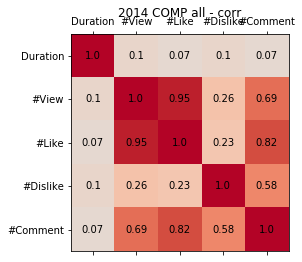

[[0.00000000e+00 3.22963705e-01 4.85965495e-01 3.20878084e-01
  4.94008696e-01]
 [3.22963705e-01 0.00000000e+00 1.73114931e-46 1.35943830e-02
  1.18125462e-14]
 [4.85965495e-01 1.73114931e-46 0.00000000e+00 2.56578321e-02
  1.58037846e-23]
 [3.20878084e-01 1.35943830e-02 2.56578321e-02 0.00000000e+00
  1.51894862e-09]
 [4.94008696e-01 1.18125462e-14 1.58037846e-23 1.51894862e-09
  0.00000000e+00]]


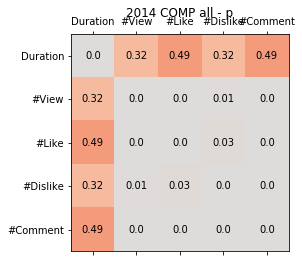

In [127]:
# 2014 comp all
heatmap_from_csv(arr=corr_pearson, title="2014 COMP all - corr")
heatmap_from_csv(arr=p_pearson, title="2014 COMP all - p")

In [128]:
# 2014 comp explanation
data_filtered = data_dropna[data_dropna["content"] == "paper_explanation"]

In [129]:
len(data_filtered), len(data_raw)

(12, 143)

In [131]:
corr_pearson = np.zeros((5,5))
p_pearson = np.zeros((5,5))
for i in range(16,21):
    for j in range(16,21):
        corr_pearson[i-16][j-16], p_pearson[i-16][j-16] = stats.pearsonr(data_filtered[data_filtered.columns[i]], data_filtered[data_filtered.columns[j]])

[[ 1.          0.06389466  0.06449542  0.06200045 -0.18431127]
 [ 0.06389466  1.          0.99999781  0.99999105  0.35156583]
 [ 0.06449542  0.99999781  1.          0.99999491  0.35174574]
 [ 0.06200045  0.99999105  0.99999491  1.          0.35229393]
 [-0.18431127  0.35156583  0.35174574  0.35229393  1.        ]]


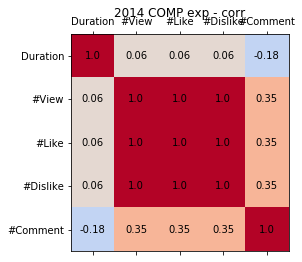

[[4.25061421e-78 8.43612018e-01 8.42157815e-01 8.48200100e-01
  5.66347922e-01]
 [8.43612018e-01 0.00000000e+00 3.96702087e-28 4.51657885e-25
  2.62449315e-01]
 [8.42157815e-01 3.96702087e-28 1.32831694e-79 2.67933694e-26
  2.62188181e-01]
 [8.48200100e-01 4.51657885e-25 2.67933694e-26 0.00000000e+00
  2.61393472e-01]
 [5.66347922e-01 2.62449315e-01 2.62188181e-01 2.61393472e-01
  0.00000000e+00]]


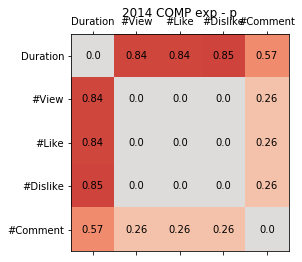

In [132]:
# 2014 comp all
heatmap_from_csv(arr=corr_pearson, title="2014 COMP exp - corr")
heatmap_from_csv(arr=p_pearson, title="2014 COMP exp - p")